<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on SageMaker, Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [2]:
from tensorflow.keras.datasets import reuters
import numpy as np
# save np.load
np_load_old = np.load
# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
# call load_data with allow_pickle implicitly set to true
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

# restore np.load for future normal usage
np.load = np_load_old

In [3]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

557056/550378 [==============================] - 0s 0us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [4]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 46
max_features = len(word_index.values())
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


print('Build model...')

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
Build model...


In [28]:
model = Sequential()
model.add(Embedding(max_features+1, 64))
model.add(LSTM(64))
model.add(Dense(max_features, activation='softmax'))

In [29]:
# You should only run this cell once your model has been properly configured

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(X_test, y_test))

score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)

print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 8982 samples, validate on 2246 samples
2246/2246 [==============================] - 7s 3ms/sample - loss: 2.4033 - acc: 0.3664
Test score: 2.403268739780144
Test accuracy: 0.3664292


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

pad_sequences truncates sequences longer than the maxlen variable, and will add padding to sequences shorter than maxlen.
pad_sequences makes all of the sequences the same length. This is necessary to ensure the batches will all work properly when processed by the RNN

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

Long-ShortTerm Memory Cell units are used to allow the RNN to learn patterns by referencing data that was presented to it in the past.
This allows it to detect inputs it has seen before and to give a similar activation to when it saw that data before.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

1. Language Generation: They are suited for this as they can remember patterns presented in the training data set and can generate useful sequences that actually make sense.

2. Speech Recognition: Can be used to detect patterns in input sound wave sequences to detremine the most likely word spoken.

3. Speech Sythesis: In a similar way to being able to recognize speech, an RNN could be used to generate speech based on what it was trained on.

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [30]:
!pip install google_images_download

In [31]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "lilly frog pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = lilly frog pond
Evaluating...
Starting Download...
Image URL: https://i.pinimg.com/originals/9a/49/08/9a49083d4d7458a194a451eea757a444.jpg
Completed Image ====> 1.9a49083d4d7458a194a451eea757a444.jpg
Image URL: http://www.slrobertson.com/images/usa/georgia/atlanta/atl-botanical-gardens/frog-lily-pond-2-b.jpg
Completed Image ====> 2.frog-lily-pond-2-b.jpg
Image URL: https://cdn.pixabay.com/photo/2017/07/14/17/44/frog-2504507_960_720.jpg
Completed Image ====> 3.frog-2504507_960_720.jpg
Image URL: https://c1.wallpaperflare.com/preview/866/536/996/bull-frog-green-pond-lily-pad.jpg
Completed Image ====> 4.bull-frog-green-pond-lily-pad.jpg
Image URL: https://c8.alamy.com/comp/C63A50/green-frog-floating-on-a-water-lily-pad-in-a-pond-with-pink-flowers-C63A50.jpg
Completed Image ====> 5.green-frog-floating-on-a-water-lily-pad-in-a-pond-with-pink-flowers-C63A50.jpg

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals* 
- Check for fish or other labels
- Create a matplotlib visualizations of the images and your prediction as the visualization label

In [60]:
# You've got something to do in this cell. ;)

import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

frogs = ['bullfrog', 'tree_frog', 'tailed_frog']

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a boolean (True/False) if a frog is in the image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`             function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    print(results)
    for result in results:
        if result[1] in frogs:
            return 'frog'
        
    return 'not frog'
            
            
    return None

#### Stretch Goal: Displaying Predictions

In [47]:
import matplotlib.pyplot as plt
import os

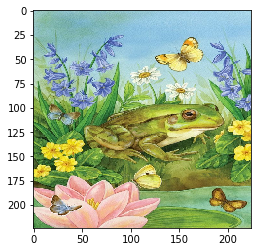

[('n04476259', 'tray', 0.54341584), ('n03485794', 'handkerchief', 0.19232363), ('n01644373', 'tree_frog', 0.029695272)]
frog



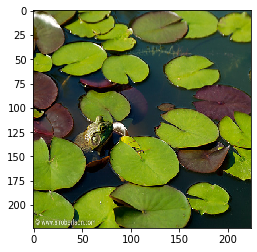

[('n03991062', 'pot', 0.6190424), ('n01641577', 'bullfrog', 0.090554826), ('n01667778', 'terrapin', 0.0475744)]
frog



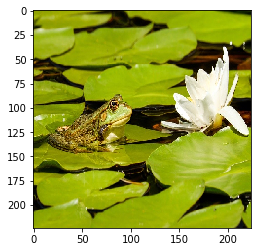

[('n01641577', 'bullfrog', 0.34856018), ('n01644900', 'tailed_frog', 0.33052072), ('n01737021', 'water_snake', 0.15649961)]
frog



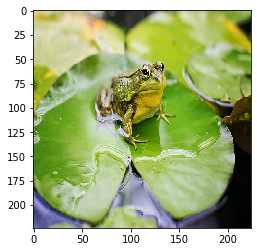

[('n01641577', 'bullfrog', 0.816916), ('n01644900', 'tailed_frog', 0.11504787), ('n01644373', 'tree_frog', 0.06311647)]
frog



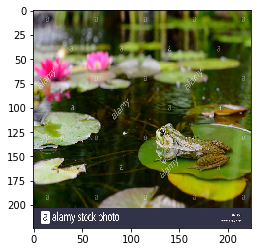

[('n01641577', 'bullfrog', 0.49318174), ('n01667778', 'terrapin', 0.20434846), ('n01698640', 'American_alligator', 0.17510232)]
frog



In [61]:
path = './downloads/lilly frog pond/'

paths = os.listdir(path)

for file in paths:
    img = process_img_path(path+file)
    plt.imshow(img)
    plt.show()
    prediction = img_contains_frog(img)
    print(prediction)
    print()

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 
An autoencoder can be used for creating a format to use in the compression of files to the smallest possible size with minimal information loss. This is even more effective if all the files to be encoded are very similar in starting format.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
- What area of Data Science would you most like to learn more about, and why?
- Where do you think Data Science will be in 5 years?
- What are the threats posed by AI to our society?
- How do you think we can counteract those threats? 
- Do you think achieving General Artifical Intelligence is ever possible?

A few sentences per answer is fine - only elaborate if time allows.

1. My strongest area as a Data Scientist would be ability to experiment and think conceptually about issues to come to a conclusion more efficiently. I am also fairly competent at deploying Flask APIs to Heroku. 
2. I would like to learn more about how I would implement more APIs on different platforms such as AWS instead of Heroku.
3. I think data science will have evolved immensly. Honestly, it might be impossible to determine the state of data science since it could advance to such a degree in the areas video processing and modeling, including realistic water and physics models with reduced computational load. I also believe a lot of progress will be made in the areas of computer vision and AI robotics. 
4. Threats posed to our society by AI technology is the idea of an advanced AI that can perform tasks we cannot counteract or access information that it is not intended to. This can lead to breaches of saftey or privacy which is not good.
5. We can counteract the threats posed to our society by devloping in limited environments such as a sort of sandbox environment limited in its scope to the outside world. Another common suggestion is to pass legislation to prevent development of advanced machine intelligence.
6. I do believe general artificial intelligence is possible eventually. 

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [62]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")